
## Introduction to Neural Networks

<p style="text-align: justify;">
Neural networks are a fundamental componenet of modern artificial intelligence (AI) and machine learning, inspired by the structure and functionality of the human brain. These computational systems are designed to process data, recognize patterns, and make predictions or decisions. Neural networks are particularly effective in solving complex problems. </p>

<p style="text-align: justify;"> The foundation of a neural network lies in its architecture, which consists of interconnected layers of nodes (neurons). Each neuron processes input data by applying a weighted sum followed by an activation function, mimicking the way biological neurons respond to stimuli. The network is structured into three main types of layers: </p>

**Input Layer** - Accepts raw data or features to be analyzed. \
**Hidden Layers** - Process and transform the data through multiple layers of computations. \
**Output Layer** - Produces the final result, such as a prediction or classification. 

<p style="text-align: justify;"> Neural networks are highly versatile due to their ability to learn from data. This is achieved through a training process, where the network adjusts its internal parameters (weights and biases) to minimize errors using algorithms such as backpropagation and optimization techniques like gradient descent.</p>



### Artificial Neuron and the Single Perceptron

An artificial neuron is the basic building block of artificial neural networks, designed to mimic the way biological neurons in the human brain process information. Each artificial neuron receives multiple inputs, processes them using a weighted sum, applies a non-linear activation function, and produces an output. This simple mechanism allows artificial neurons to model complex relationships in data.


<img style="max-width:60%;max-height:60%;" src="https://miro.medium.com/max/1290/1*-JtN9TWuoZMz7z9QKbT85A.png" width= '400'>


Mathematically, an artificial neuron operates as follows:  

$$
\
y = f\left(\sum_{i=1}^{n} w_i x_i + b\right)
\
$$

Where:  $$
x_i : \text{ are the input features.}  
$$

$$
w_i : \text{ are the weights associated with each input.}  
$$

$$
b : \text{ is the bias term, which allows for shifting the activation function.}  
$$

$$
f : \text{ is the activation function that introduces non-linearity.}  
$$

$$
y : \text{ is the output of the neuron.}  
$$

This foundational concept laid the groundwork for the development of the perceptron, one of the earliest and simplest types of artificial neurons. The perceptron, introduced by Frank Rosenblatt in 1958, is a supervised learning algorithm for binary classification tasks. It represents a single-layer neural network that predicts an output based on the weighted sum of inputs and a threshold function. The perceptron learns by adjusting its weights and bias during training to minimize classification errors, using a process known as the perceptron learning rule.  

<img src="https://www.edureka.co/blog/wp-content/uploads/2017/12/Perceptron-Learning-Algorithm_03.gif" width="500">

The perceptron can be mathematically expressed as:  
$$
\
y = 
\begin{cases} 
1 & \text{if } \sum_{i=1}^{n} w_i x_i + b > 0 \\
0 & \text{otherwise} 
\end{cases}
\
$$


    



In [2]:
#Load Necessary packages and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

Describe the class and type of iris dataset?
How are the classes of iris dataset encoded?
What is the training size of the dataset?
Why do you normalise a data?

In [4]:

# Load Iris Dataset
iris = datasets.load_iris()

#Inspect the number of features and their names

X = iris.data[:, :2]  # Use first two features for visualization
y = iris.target

# Filter to use only two classes for binary classification
binary_class_indices = y < 2  # Keep classes 0 (Setosa) and 1 (Versicolor)
X = X[binary_class_indices]
y = y[binary_class_indices]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize Data
X_train = (X_train - X_train.min(axis=0)) / (X_train.max(axis=0) - X_train.min(axis=0))
X_test = (X_test - X_train.min(axis=0)) / (X_train.max(axis=0) - X_train.min(axis=0))


How can you express a single layer perceptron mathematically also explain its notations?

In [6]:

# Single Layer Perceptron Class
class SingleLayerPerceptron:
    def __init__(self, my_weights, my_bias, learningRate=0.05):
        self.weights = my_weights
        self.bias = my_bias
        self.learningRate = learningRate

    def activation(self, net):
        return 1 if net > 0 else 0

    def neuron(self, inputs):
        return np.dot(self.weights, inputs) + self.bias

    def neuron_propagate(self, inputs):
        return self.activation(self.neuron(inputs))

    def training(self, inputs, output):
        output_prev = self.neuron_propagate(inputs)
        self.weights = [W + X * self.learningRate * (output - output_prev)
                        for (W, X) in zip(self.weights, inputs)]
        self.bias += self.learningRate * (output - output_prev)
        error_calculation = np.abs(output_prev - output)
        return error_calculation


What are the initial weights and bias assigned?

In [8]:

# Initialize Perceptron
initial_weights = [0.1, 0.1]
initial_bias = 0.1
learning_rate = 0.5
SLperceptron = SingleLayerPerceptron(initial_weights, initial_bias, learning_rate)


In [10]:
# Training Function
def trainingData(SinglePerceptron, inputs, outputs):
    count = 0
    for i, input_vec in enumerate(inputs):
        count += SinglePerceptron.training(input_vec, outputs[i])
    return count

# Decision Boundary Visualization
def limit(neuron, x_values):
    weights_0 = neuron.weights[0]
    weights_1 = neuron.weights[1]
    bias = neuron.bias
    return -(weights_0 * x_values + bias) / weights_1

def show_threshold(SinglePerceptron, ax):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    x2 = [limit(SinglePerceptron, x1) for x1 in xlim]
    ax.plot(xlim, x2, color="green")
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 1.1)

# Plot Dataset
def show_dataset(X, y, ax):
    for label, color in zip(np.unique(y), ['red', 'blue']):
        idx = y == label
        ax.scatter(X[idx, 0], X[idx, 1], label=f"Class {label}", c=color)
    plt.legend()
    plt.grid()
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 1.1)

How many itearions is the perceptron trained?
What does epoch mean in the context of Neural network?
for How many epochs does the model train?
Which is the best fitted model and why?
Which is the worst fitted model and why?
Can you explain the causes of worst fitted model?
What are the delimitations of such a method?
How would you apply neural networks to uncover genes responsible for drug resistance?

/var/folders/xl/783hy6ks6xd91gp32v4952680000gn/T/ipykernel_25966/2027170982.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


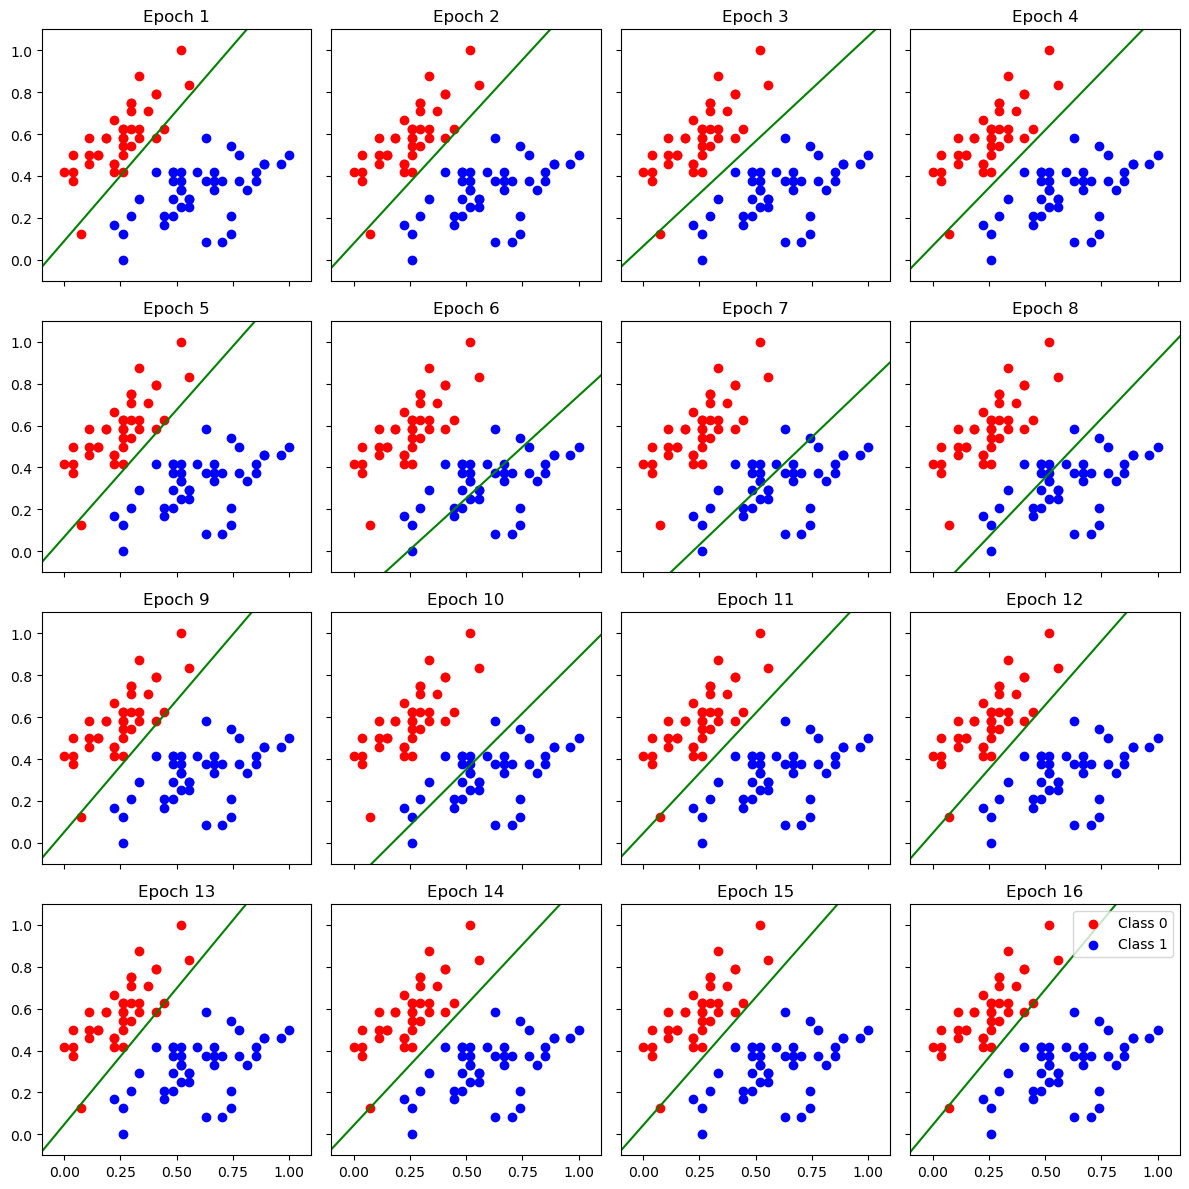

In [12]:
# Train the Perceptron and Visualize Progress
fig, axs = plt.subplots(4,4, sharex=True, sharey=True, figsize=(12, 12))
axs = axs.ravel()

train_epoch = 16

for epoch in range(train_epoch):
    ax = axs[epoch]
    show_dataset(X_train, y_train, ax)
    trainingData(SLperceptron, X_train, y_train)
    show_threshold(SLperceptron, ax)
    ax.set_title(f"Epoch {epoch + 1}")

plt.tight_layout()
plt.show()